In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump
from sklearn import tree


Loading the training data of the 

In [30]:
X_train = pd.read_csv("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/X_train.csv")
y_train = pd.read_csv("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/y_train.csv")
X_test =  pd.read_csv("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/X_test.csv")
y_test = pd.read_csv("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/y_test.csv")
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,80,74,11,60,30.0,0.527,22
1,2,119,0,0,0,19.6,0.832,72
2,10,115,0,0,0,0.0,0.261,30
3,1,181,78,42,293,40.0,1.258,22
4,4,97,60,23,0,28.2,0.443,22


In [41]:
rf = RandomForestClassifier(n_estimators=100,random_state = 0)
search_space = {
    'max_depth': [4, 8],
    'min_samples_leaf': [4,6]
}
rf_grid = GridSearchCV(rf, search_space, cv=5, scoring='precision').fit(X_train, y_train)
rf_grid.score(X_test,y_test)


/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d a

{'max_depth': 4, 'min_samples_leaf': 6}


0.7659574468085106

In [32]:
y_pred = rf_grid.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [33]:
mse = mean_squared_error(y_test, y_pred)
mse

0.21875

In [39]:

precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

Classification report for this classifier

In [40]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       145
           1       0.54      0.77      0.63        47

    accuracy                           0.78       192
   macro avg       0.72      0.78      0.74       192
weighted avg       0.82      0.78      0.79       192



Text(113.9222222222222, 0.5, 'predicted label')

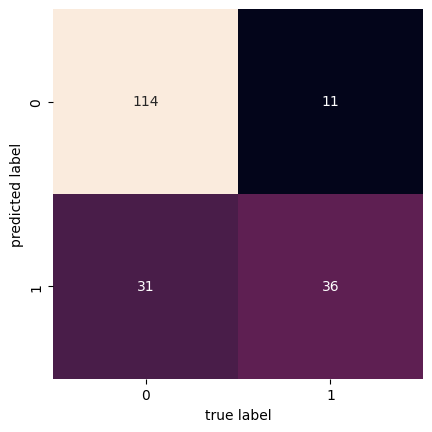

In [35]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [36]:
dump(rf_grid, open("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/random_forest_regressor_default_0.sav", "wb"))